In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import math
import tensorflow as tf
import time 

from skimage.io import imread
from skimage.transform import resize
    
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import Sequence
print(tf.__version__)

2.2.0


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
tf.config.experimental.set_memory_growth(device=gpus[1], enable=True)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='relu',
                              input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [21]:
class FashionSequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        return np.array(batch_x), np.array(batch_y)
    
    def __iter__(self):
        """Create a generator that iterate over the Sequence."""
        for item in (self[i] for i in range(len(self))):
            yield item


In [22]:
train_seq = FashionSequence(x_train_scaled, y_train, 50)

In [27]:
for x,y in train_seq:
    print(x.shape,y.shape)

(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 28, 1) (50,)
(50, 28, 2

In [18]:
valid_seq = FashionSequence(x_valid_scaled, y_valid, 50)

In [20]:
model.fit(train_seq, epochs=10, validation_data = valid_seq)

Epoch 1/10
1100/1100 [==============================] - 5s 5ms/step - loss: 0.1441 - accuracy: 0.9450 - val_loss: 0.2416 - val_accuracy: 0.9114
Epoch 2/10
1100/1100 [==============================] - 5s 5ms/step - loss: 0.1349 - accuracy: 0.9501 - val_loss: 0.2508 - val_accuracy: 0.9104
Epoch 3/10
1100/1100 [==============================] - 5s 5ms/step - loss: 0.1302 - accuracy: 0.9515 - val_loss: 0.2437 - val_accuracy: 0.9106
Epoch 4/10
1100/1100 [==============================] - 5s 5ms/step - loss: 0.1240 - accuracy: 0.9522 - val_loss: 0.2450 - val_accuracy: 0.9108
Epoch 5/10
1100/1100 [==============================] - 5s 5ms/step - loss: 0.1154 - accuracy: 0.9562 - val_loss: 0.2780 - val_accuracy: 0.9058
Epoch 6/10
1100/1100 [==============================] - 5s 5ms/step - loss: 0.1114 - accuracy: 0.9581 - val_loss: 0.2568 - val_accuracy: 0.9160
Epoch 7/10
1100/1100 [==============================] - 5s 5ms/step - loss: 0.1019 - accuracy: 0.9620 - val_loss: 0.2882 - val_accuracy:

In [7]:
train_datagen = keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow(x_train_scaled, y_train, 50)

valid_datagen = keras.preprocessing.image.ImageDataGenerator()
valid_generator = valid_datagen.flow(x_valid_scaled, y_valid, 50)

history = model.fit(train_generator, epochs=10, validation_data = valid_generator)

Epoch 1/10


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-7-46f23cf1c799>:7) ]] [Op:__inference_train_function_806]

Function call stack:
train_function


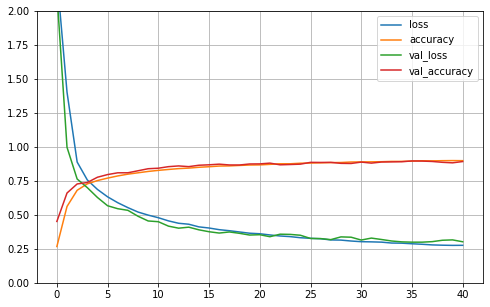

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()

plot_learning_curves(history)

In [9]:
test_datagen = keras.preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow(x_test_scaled, y_test, 500)

In [10]:
model.evaluate(test_generator)

20/20 [==============================] - 1s 34ms/step - loss: 0.3289 - accuracy: 0.8820


[0.3288644552230835, 0.8820000290870667]

In [26]:
!nvidia-smi

Thu Jul  9 11:32:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.126.02   Driver Version: 418.126.02   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:3B:00.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:AF:00.0 Off |                    0 |
| N/A   64C    P0    32W /  70W |   1153MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        